# Data Analysis 3 - Assignment 1

## Setup

In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse,rmse


In [40]:
# Current script and repository folder
current_path = os.getcwd()
repository_path = current_path.split('DA3-A1')[0]

In [41]:
# Add utils folder to sys path 
# Note: os.path.join() creates a string with the right syntax for defining a path for your operating sytem.
sys.path.append(os.path.join(repository_path, 'utils'))

In [42]:
# Define data folder
data_path = os.path.join(repository_path, 'data')

In [43]:
# Import the prewritten helper functions
from py_helper_functions import *

In [44]:
# DATA IMPORT - FROM FILE
data_all = pd.read_csv(os.path.join(data_path, 'morg-2014-emp.csv'))

In [45]:
# DATA IMPORT - FROM GITHUB
#data_all = pd.read_csv('https://raw.githubusercontent.com/mateschieszler/data/main/morg/morg-2014-emp.csv')

In [46]:
data_all.head()

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work


In [47]:
# Physicians and surgeons
data_all.loc[data_all["occ2012"] == 2100]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
23,45,960021970039060,January,AL,3811.7857,1442.30,50,45,1,NaN,...,0,0,"Native, Born In US",63,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
295,656,235004820400137,January,AZ,3434.7076,1384.61,40,44,1,NaN,...,0,0,"Native, Born In US",86,"Justice, public order, and safety activities (...",2100,Government - Federal,No,No,Employed-At Work
659,1489,97977400095618,January,CA,3166.3863,2307.00,50,46,1,NaN,...,1,4,"Native, Born In US",93,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
764,1729,435002800600122,January,CA,3060.5871,700.00,50,45,1,NaN,...,0,0,"Native, Born In US",93,"Accounting, tax preparation, bookkeeping, and ...",2100,"Private, For Profit",No,No,Employed-At Work
901,1996,700609983456587,January,CA,3057.3628,2884.61,50,46,1,NaN,...,0,0,"Native, Born In US",93,Investigation and security services (5616),2100,"Private, For Profit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148753,315864,1244006650301,December,WV,649.2498,800.00,40,45,1,NaN,...,2,10,"Native, Born In US",5,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
148773,315914,108415040044617,December,WV,591.4034,1105.76,35,44,1,NaN,...,0,0,"Native, Born In US",5,"Justice, public order, and safety activities (...",2100,Government - State,No,No,Employed-At Work
149009,316461,369590869500970,December,WI,2178.9901,961.53,40,45,1,NaN,...,2,5,"Native, Born In US",3,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
149147,316709,31036591500581,December,WY,319.0023,865.38,40,45,1,NaN,...,2,3,"Native, Born In US",8,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work


In [48]:
# Construction laborers 6260
code = 2100
data_all.loc[data_all["occ2012"] == code]

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
23,45,960021970039060,January,AL,3811.7857,1442.30,50,45,1,NaN,...,0,0,"Native, Born In US",63,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
295,656,235004820400137,January,AZ,3434.7076,1384.61,40,44,1,NaN,...,0,0,"Native, Born In US",86,"Justice, public order, and safety activities (...",2100,Government - Federal,No,No,Employed-At Work
659,1489,97977400095618,January,CA,3166.3863,2307.00,50,46,1,NaN,...,1,4,"Native, Born In US",93,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
764,1729,435002800600122,January,CA,3060.5871,700.00,50,45,1,NaN,...,0,0,"Native, Born In US",93,"Accounting, tax preparation, bookkeeping, and ...",2100,"Private, For Profit",No,No,Employed-At Work
901,1996,700609983456587,January,CA,3057.3628,2884.61,50,46,1,NaN,...,0,0,"Native, Born In US",93,Investigation and security services (5616),2100,"Private, For Profit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148753,315864,1244006650301,December,WV,649.2498,800.00,40,45,1,NaN,...,2,10,"Native, Born In US",5,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
148773,315914,108415040044617,December,WV,591.4034,1105.76,35,44,1,NaN,...,0,0,"Native, Born In US",5,"Justice, public order, and safety activities (...",2100,Government - State,No,No,Employed-At Work
149009,316461,369590869500970,December,WI,2178.9901,961.53,40,45,1,NaN,...,2,5,"Native, Born In US",3,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work
149147,316709,31036591500581,December,WY,319.0023,865.38,40,45,1,NaN,...,2,3,"Native, Born In US",8,Legal services (5411),2100,"Private, For Profit",No,No,Employed-At Work


In [49]:
data_all["w"] = data_all["earnwke"] / data_all["uhours"] # hourly wage
data_all["lnw"] = np.log(data_all["w"]) #log hourly wage
data_all["agesq"] = np.power(data_all["age"], 2) # age squared

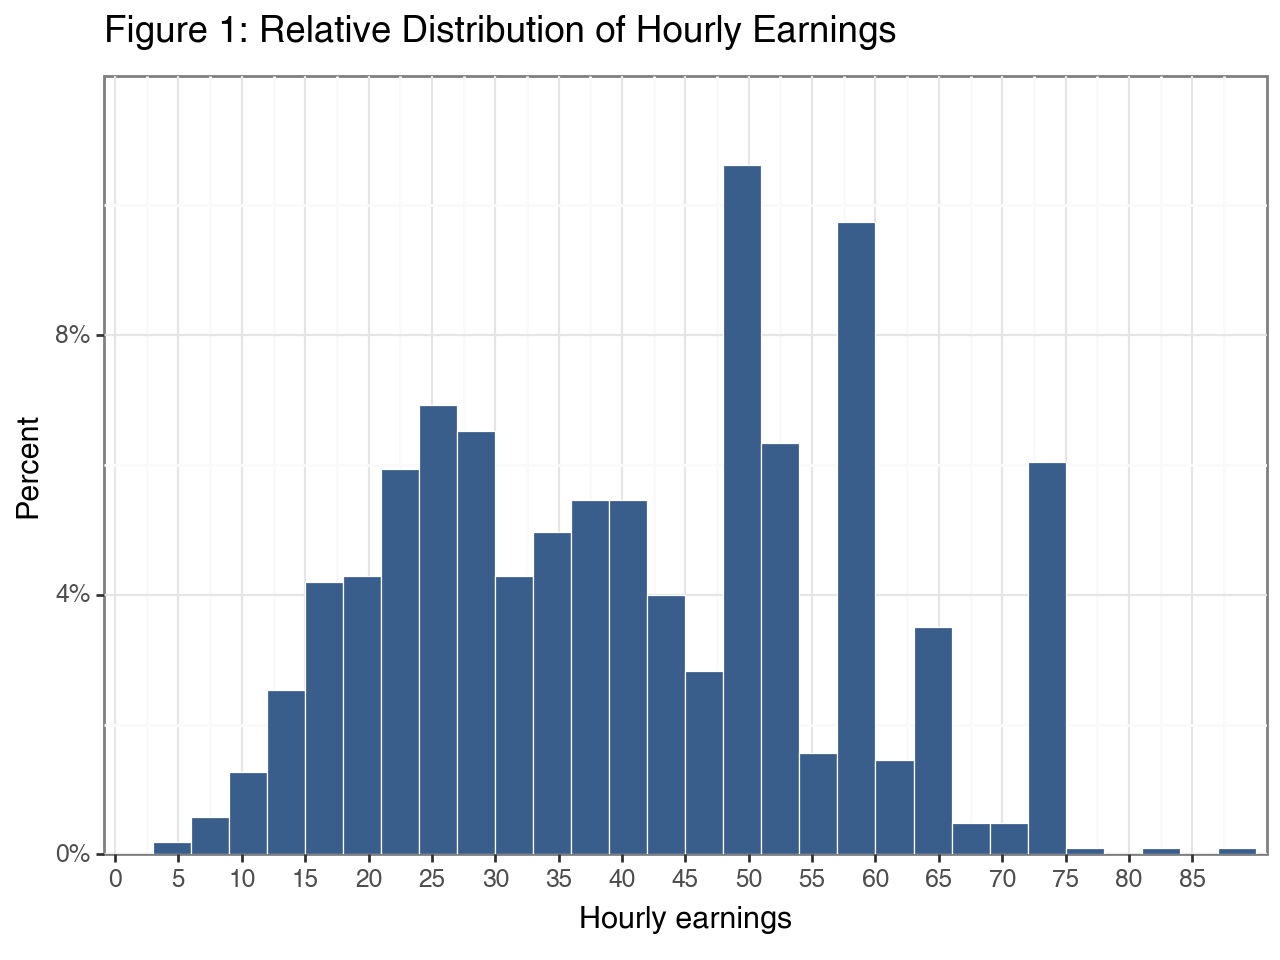

<Figure Size: (640 x 480)>

In [50]:
# Plot the relative distribution of hourly earnings 
(
    ggplot(data_all.loc[data_all["occ2012"] == code], aes(x="w", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent", title="Figure 1: Relative Distribution of Hourly Earnings")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

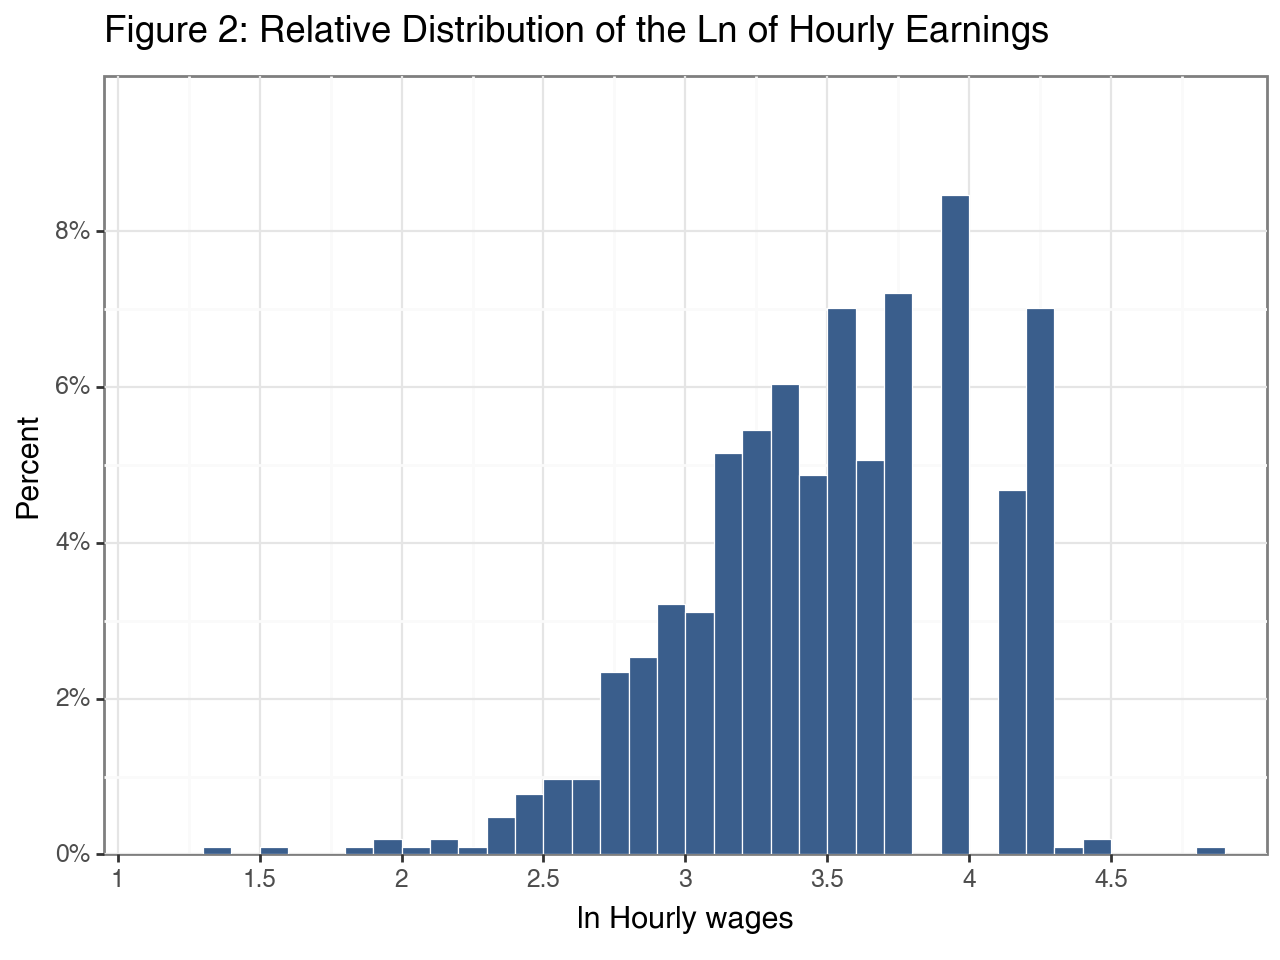

<Figure Size: (640 x 480)>

In [51]:
# Plot the relative distribution of the ln of hourly earnings 
(
    ggplot(data_all.loc[data_all["occ2012"] == code], aes(x="lnw", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=0.1,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="ln Hourly wages", y="Percent",title="Figure 2: Relative Distribution of the Ln of Hourly Earnings")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 0.5))
    + scale_y_continuous(
        expand=(0.0, 0.0),
        limits=(0, 0.1),
        breaks=seq(0, 0.1, 0.02),
        labels=percent_format(), #mizani
    )
    + theme_bw()
)

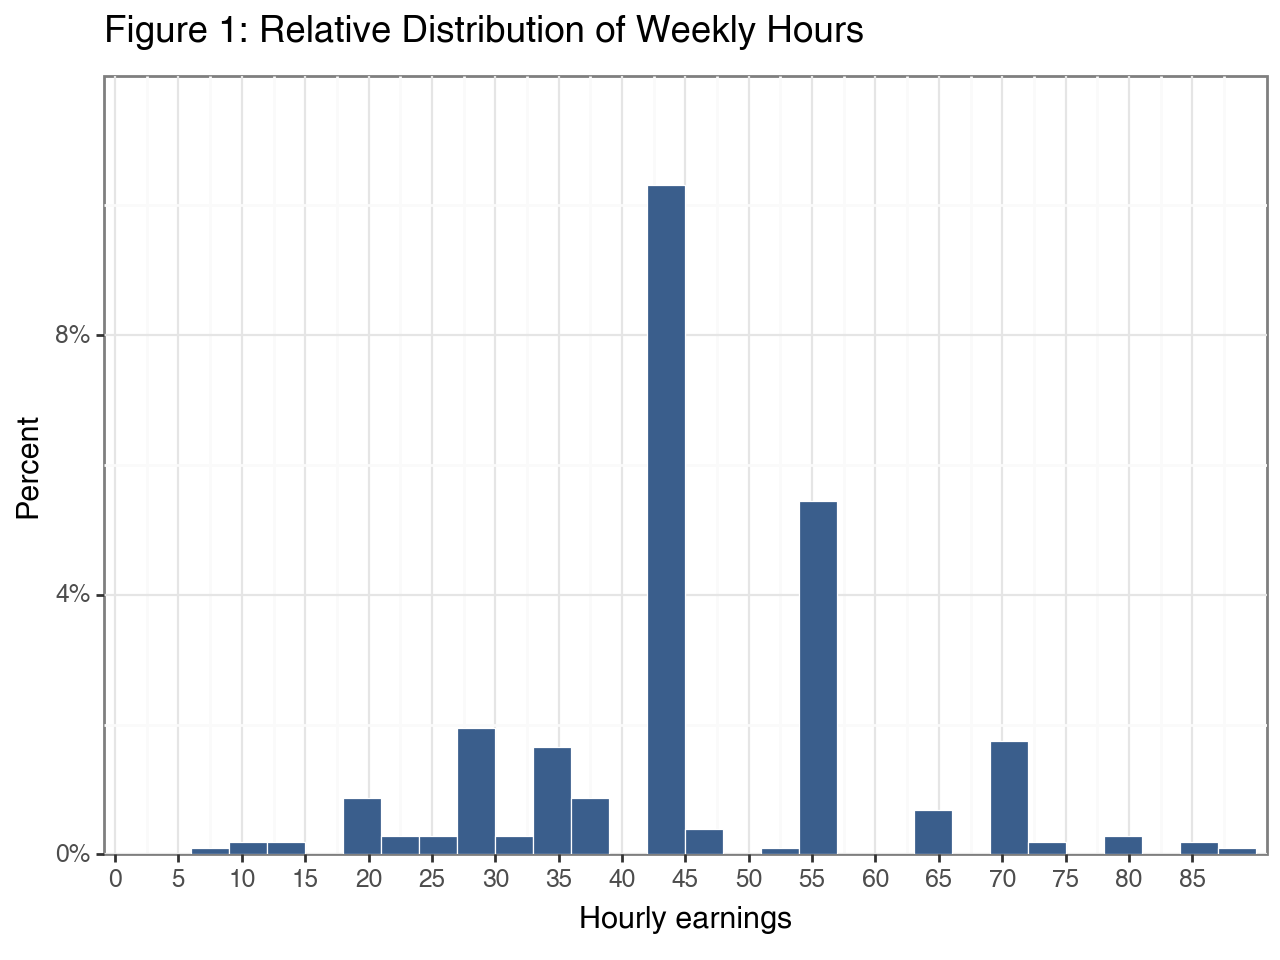

<Figure Size: (640 x 480)>

In [52]:
# Plot the relative distribution of hourly earnings 
(
    ggplot(data_all.loc[data_all["occ2012"] == code], aes(x="uhours", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent", title="Figure 1: Relative Distribution of Weekly Hours")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

In [53]:
data = data_all.loc[data_all["occ2012"] == code]

In [54]:
data.shape

(1027, 26)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 23 to 149295
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1027 non-null   int64  
 1   hhid        1027 non-null   int64  
 2   intmonth    1027 non-null   object 
 3   stfips      1027 non-null   object 
 4   weight      1027 non-null   float64
 5   earnwke     1027 non-null   float64
 6   uhours      1027 non-null   int64  
 7   grade92     1027 non-null   int64  
 8   race        1027 non-null   int64  
 9   ethnic      46 non-null     float64
 10  age         1027 non-null   int64  
 11  sex         1027 non-null   int64  
 12  marital     1027 non-null   int64  
 13  ownchild    1027 non-null   int64  
 14  chldpres    1027 non-null   int64  
 15  prcitshp    1027 non-null   object 
 16  state       1027 non-null   object 
 17  ind02       1027 non-null   object 
 18  occ2012     1027 non-null   int64  
 19  class       1027 non-nul

In [56]:
data.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94', 'w', 'lnw', 'agesq'],
      dtype='object')

In [57]:
# 'earnwke', 'uhours', 'grade92', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital', 'ownchild', 'chldpres', 'prcitshp' , 'state', 'class', 'unionmme', 'unioncov', 'agesq'

In [58]:
# Manage missing
# data["earnwke"] = data["earnwke"].fillna("Missing") # traget variable
# data["uhours"] = data["uhours"].fillna("Missing") # not used
data["grade92"] = data["grade92"].fillna("Missing") # level of education
data["race"] = data["race"].fillna("Missing") # race
# data["ethnic"] = data["ethnic"].fillna("Missing") # Hispanic community sub-division
data["age"] = data["age"].fillna("Missing") # age
data["sex"] = data["sex"].fillna("Missing") # sex
data["marital"] = data["marital"].fillna("Missing") # marital status
data["ownchild"] = data["ownchild"].fillna("Missing") # number of children
data["chldpres"] = data["chldpres"].fillna("Missing") # children in the household
# data["state"] = data["state"].fillna("Missing") # state, not used
data["class"] = data["class"].fillna("Missing") # classification
data["unionmme"] = data["unionmme"].fillna("Missing") # union membership
data["unioncov"] = data["unioncov"].fillna("Missing") # union coverage
data["agesq"] = data["marital"].fillna("Missing") # age squared

In [59]:
# check frequency by level of education
freq = data.groupby("grade92").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
grade92,,,
33,1,0.097,0.097
38,1,0.097,0.194
39,10,0.974,1.168
40,7,0.682,1.850
41,2,0.195,2.045
42,6,0.584,2.629
43,28,2.726,5.355
44,56,5.453,10.808
45,727,70.789,81.597


In [60]:
# check frequency by race
freq = data.groupby("race").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
race,,,
1,895,87.147,87.147
2,58,5.648,92.795
3,5,0.487,93.282
4,53,5.161,98.443
5,1,0.097,98.540
6,1,0.097,98.637
7,3,0.292,98.929
8,9,0.876,99.805
10,1,0.097,99.902


In [61]:
# check frequency by ethnicity - not relevant
freq = data.groupby("ethnic").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ethnic,,,
1.0,20,43.478,43.478
2.0,6,13.043,56.521
3.0,4,8.696,65.217
4.0,1,2.174,67.391
5.0,2,4.348,71.739
6.0,1,2.174,73.913
7.0,5,10.870,84.783
8.0,7,15.217,100.000


In [62]:
# check frequency by sex
freq = data.groupby("sex").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
sex,,,
1,619,60.273,60.273
2,408,39.727,100.000


In [63]:
# check frequency by marital status
freq = data.groupby("marital").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
marital,,,
1,678,66.018,66.018
2,3,0.292,66.310
3,11,1.071,67.381
4,7,0.682,68.063
5,68,6.621,74.684
6,10,0.974,75.658
7,250,24.343,100.001


In [64]:
# check frequency by sex
freq = data.groupby("ownchild").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
ownchild,,,
0,592,57.644,57.644
1,142,13.827,71.471
2,215,20.935,92.406
3,61,5.940,98.346
4,16,1.558,99.904
5,1,0.097,100.001


In [65]:
# check frequency by sex
freq = data.groupby("chldpres").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
chldpres,,,
0,592,57.644,57.644
1,53,5.161,62.805
2,22,2.142,64.947
3,121,11.782,76.729
4,56,5.453,82.182
5,48,4.674,86.856
6,6,0.584,87.440
8,46,4.479,91.919
9,1,0.097,92.016


In [66]:
# check frequency by sex
freq = data.groupby("prcitshp").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
prcitshp,,,
"Foreign Born, Not a US Citizen",14,1.363,1.363
"Foreign Born, US Cit By Naturalization",38,3.700,5.063
"Native, Born Abroad Of US Parent(s)",11,1.071,6.134
"Native, Born In US",960,93.476,99.610
"Native, Born in PR or US Outlying Area",4,0.389,99.999


In [67]:
# check frequency by sex
freq = data.groupby("class").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
class,,,
Government - Federal,129,12.561,12.561
Government - Local,87,8.471,21.032
Government - State,101,9.834,30.866
"Private, For Profit",660,64.265,95.131
"Private, Nonprofit",50,4.869,100.000


In [68]:
# check frequency by sex
freq = data.groupby("unionmme").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
unionmme,,,
No,970,94.45,94.45
Yes,57,5.55,100.00


In [69]:
# check frequency by sex
freq = data.groupby("unioncov").agg(frequency=("hhid", "size"))
freq["percent"] = round(freq["frequency"] / sum(freq["frequency"]) * 100, 3)
freq["cumulative_percent"] = np.cumsum(freq["percent"])
freq

,frequency,percent,cumulative_percent
unioncov,,,
Missing,57,5.550,5.550
No,941,91.626,97.176
Yes,29,2.824,100.000


## Feature engineering

In [70]:
# sex
data["female"] = (data.sex == 2).astype(int) #dummy

In [71]:
# highest grade completed
data["ed_other"] = np.where((data["grade92"].isin([44, 45, 46])), 0, 1)
data["ed_MA"] = (data["grade92"] == 44).astype(int)
data["ed_Pro"] = (data["grade92"] == 45).astype(int)
data["ed_Phd"] = (data["grade92"] == 46).astype(int)

In [72]:
data["white"] = (data["race"] == 1).astype(int)
data["afram"] = (data["race"] == 2).astype(int)
data["asian"] = (data["race"] == 4).astype(int)
data["hisp"] = (data["ethnic"].notna()).astype(int)
data["othernonw"] = (
    (data["white"] == 0) & (data["afram"] == 0) & (data["asian"] == 0) & (data["hisp"] == 0)
).astype(int) #other nonwhite

data["nonUSborn"] = (
    (data["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (data["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)

In [75]:
# Potentially endogeneous demographics
data["married"] = ((data["marital"] == 1) | (data["marital"] == 2)).astype(int)
data["divorced"] = ((data["marital"] == 3) | (data["marital"] == 5)).astype(int)
data["wiwowed"] = (data["marital"] == 4).astype(int)
data["nevermar"] = (data["marital"] == 7).astype(int)

data["child0"] = (data["chldpres"] == 0).astype(int)
data["child1"] = (data["chldpres"] == 1).astype(int)
data["child2"] = (data["chldpres"] == 2).astype(int)
data["child3"] = (data["chldpres"] == 3).astype(int)
data["child4pl"] = (data["chldpres"] >= 4).astype(int)

# Work-related variables
data["fedgov"] = (data["class"] == "Government - Federal").astype(int)
data["stagov"] = (data["class"] == "Government - State").astype(int)
data["locgov"] = (data["class"] == "Government - Local").astype(int)
data["nonprof"] = (data["class"] == "Private, Nonprofit").astype(int)
data["forprof"] = (data["class"] == "Private, For Profit").astype(int)
data["union"] = ((data["unionmme"] == "Yes") | (data["unioncov"] == "Yes")).astype(int)

In [76]:
# data summary
data[[
    "age",
    "agesq",
    "female",
    "ed_other",
    "ed_MA",
    "ed_Pro",
    "ed_Phd",
    "white",
    "afram",
    "asian",
    "hisp",
    "othernonw",
    "nonUSborn",
    "married",
    "divorced",
    "wiwowed",
    "nevermar",
    "child0",
    "child1",
    "child2",
    "child3",
    "child4pl",
    "fedgov",
    "stagov",
    "locgov",
    "nonprof",
    "forprof",
    "union",
    ]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1027.0,43.172347,10.912486,21.0,34.0,42.0,53.0,64.0
agesq,1027.0,2.818890,2.621383,1.0,1.0,1.0,6.0,7.0
female,1027.0,0.397274,0.489572,0.0,0.0,0.0,1.0,1.0
ed_other,1027.0,0.053554,0.225245,0.0,0.0,0.0,0.0,1.0
ed_MA,1027.0,0.054528,0.227167,0.0,0.0,0.0,0.0,1.0
ed_Pro,1027.0,0.707887,0.454956,0.0,0.0,1.0,1.0,1.0
ed_Phd,1027.0,0.184031,0.387698,0.0,0.0,0.0,0.0,1.0
white,1027.0,0.871470,0.334842,0.0,1.0,1.0,1.0,1.0
afram,1027.0,0.056475,0.230949,0.0,0.0,0.0,0.0,1.0
asian,1027.0,0.051607,0.221339,0.0,0.0,0.0,0.0,1.0


In [77]:
# For certain charts, we need to sort values by age

data.sort_values(by = 'age', inplace = True)

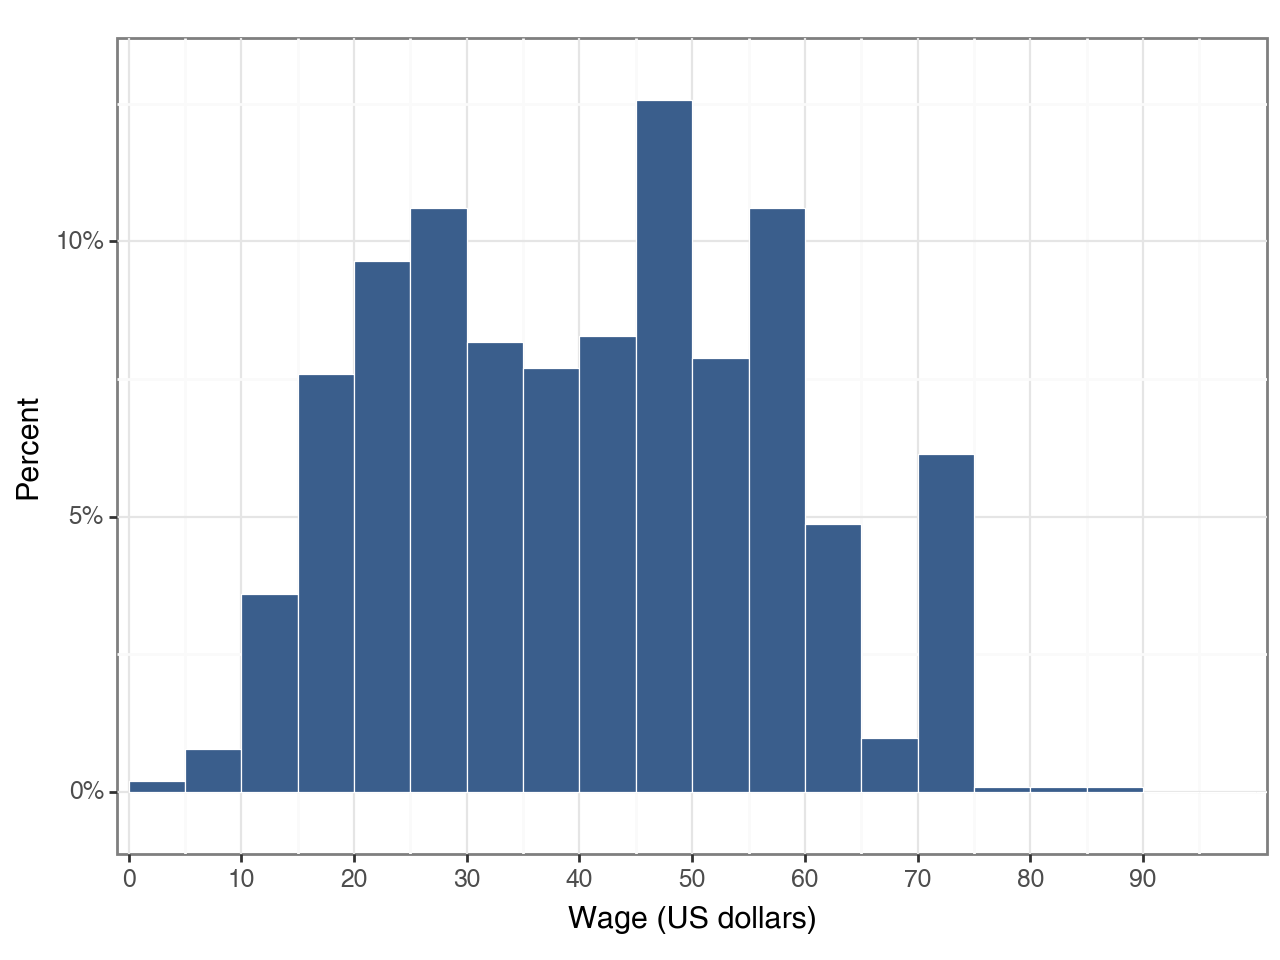

<Figure Size: (640 x 480)>

In [86]:
# using plotnine
ggplot(data, aes(x="w")) + geom_histogram(
    aes(y="(stat(count))/sum(stat(count))"),
    binwidth=5,
    boundary=0,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + coord_cartesian(xlim=(0, 100)) + labs(
    x="Wage (US dollars)", y="Percent"
) + theme_bw() + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), labels=percent_format()
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 100, 10)
)

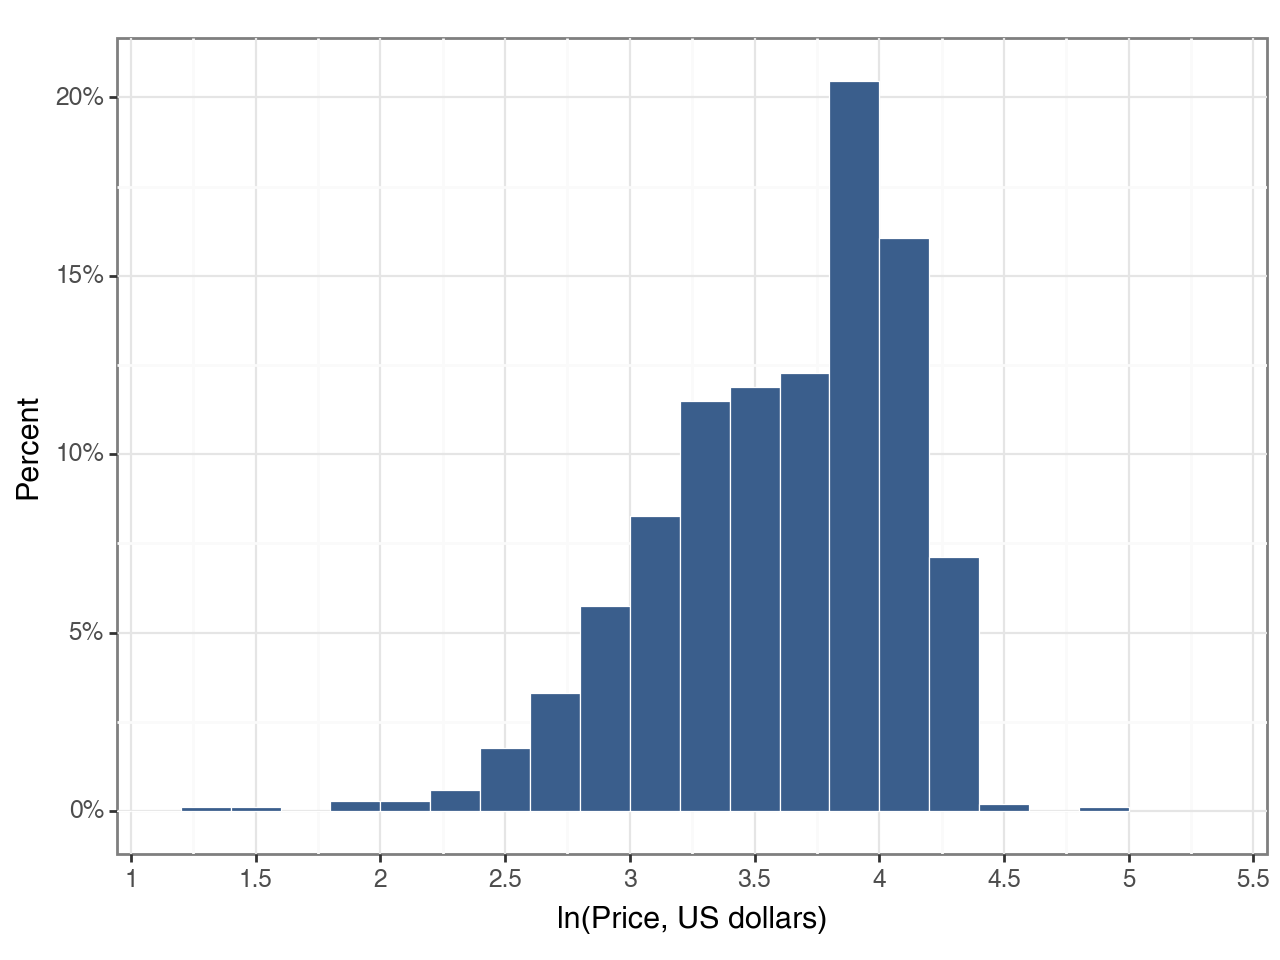

<Figure Size: (640 x 480)>

In [94]:
ggplot(data, aes(x="lnw")) + geom_histogram(
    aes(y="(stat(count)) / sum(stat(count))"),
    binwidth=0.2,
    boundary=0,
    color="white",
    fill=color[0],
    size=0.25,
    alpha=0.8,
    show_legend=False,
    na_rm=True,
) + coord_cartesian(xlim=(1, 5.5)) + labs(
    x="ln(Price, US dollars)", y="Percent"
) + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), labels=percent_format()
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 10, 0.5)
) + theme_bw()

In [ ]:
#lowess with ggplot
ggplot(data, aes(x="age", y="price")) + geom_point(
    color=color[0], size=1, alpha=0.8, show_legend=False, na_rm=True
) + geom_smooth(method="loess", se=False, colour=color[0], size=1, span=0.9) + labs(
    x="Age (years)", y="Price (US dollars)"
) + theme_bw() + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 20000), breaks=seq(0, 20000, 5000)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 30), breaks=seq(0, 30, 5)
)